---
### Aunalytics Assessment In R // Problem Statement #2

By: Cody Culver // 
Date: 3/27/2022

---

#### Problem Statement
Perform a segmentation study on the
dataset to display useful information using
any visualization library.

#### Setting Up Analysis Environment
setting up the R environment by loading the necessary packages and datasets.

In [1]:
# Importing the dataset
training_set = read.csv('au_train.csv')
test_set = read.csv('au_test.csv')

# Common package installations
library(tidyverse)
library(ggplot2)
library(lubridate)
library(janitor)
library(gridExtra)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attachi

#### Data Cleaning and Exploration
Going through typical data investigations via overviews, null checks, metadata confirmation, trimming, and sanity checks. 

In [2]:
# combine training set with test set for total data set
dataset <- union_all(training_set, test_set)

# 6 row overview of data set
head(dataset)

#checking for null values
sum(is.na(dataset))  #0 null values

# Checking for a list of unique values in categorical data to compare with metadata provided
# Will also report back "NULL" if there is an issue with a variable name
sort(unique(dataset$workclass))
sort(unique(dataset$education))
sort(unique(dataset$marital.status))
sort(unique(dataset$occupation))       # has an additional "?" variable type
sort(unique(dataset$relationship))
sort(unique(dataset$race))
sort(unique(dataset$sex))
sort(unique(dataset$native.country))   # has an additional "?" variable type
sort(unique(dataset$class))

# All data contains a white space as the first character in each variable. Trimming all white space to prevent errors:
# Need to use gsub function because white space is non ASCII type, and simple str_trim will not work.
dataset <- as.data.frame(apply(dataset, 2, function(dataset) gsub('\\s+','', dataset)))
test_set <- as.data.frame(apply(test_set, 2, function(test_set) gsub('\\s+','', test_set)))

# It was also discovered that the test_set includes an extra character on the dependent variable 'class', which must be removed
dataset <- as.data.frame(apply(dataset, 2, function(dataset) gsub('[.]','', dataset)))
test_set <- as.data.frame(apply(test_set, 2, function(test_set) gsub('[.]','', test_set)))

# Checking that 'education.num' has the same amount of categories as 'education', and that the min to max values are methodical
n_distinct(dataset$education.num)  #16 distinct values
n_distinct(dataset$education)      #16 distinct values
summary(dataset$education.num)     #max numerical value of 16

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,class
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


[1] 0

[1]  ?                 Federal-gov       Local-gov         Never-worked    
[5]  Private           Self-emp-inc      Self-emp-not-inc  State-gov       
[9]  Without-pay     
9 Levels:  ?  Federal-gov  Local-gov  Never-worked  Private ...  Without-pay

[1]  10th          11th          12th          1st-4th       5th-6th     
 [6]  7th-8th       9th           Assoc-acdm    Assoc-voc     Bachelors   
[11]  Doctorate     HS-grad       Masters       Preschool     Prof-school 
[16]  Some-college
16 Levels:  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th ...  Some-college

[1]  Divorced               Married-AF-spouse      Married-civ-spouse   
[4]  Married-spouse-absent  Never-married          Separated            
[7]  Widowed              
7 Levels:  Divorced  Married-AF-spouse ...  Widowed

[1]  ?                  Adm-clerical       Armed-Forces       Craft-repair     
 [5]  Exec-managerial    Farming-fishing    Handlers-cleaners  Machine-op-inspct
 [9]  Other-service      Priv-house-serv    Prof-specialty     Protective-serv  
[13]  Sales              Tech-support       Transport-moving 
15 Levels:  ?  Adm-clerical  Armed-Forces  Craft-repair ...  Transport-moving

[1]  Husband         Not-in-family   Other-relative  Own-child     
[5]  Unmarried       Wife          
6 Levels:  Husband  Not-in-family  Other-relative  Own-child ...  Wife

[1]  Amer-Indian-Eskimo  Asian-Pac-Islander  Black             
[4]  Other               White             
Levels:  Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White

[1]  Female  Male  
Levels:  Female  Male

[1]  ?                           Cambodia                  
 [3]  Canada                      China                     
 [5]  Columbia                    Cuba                      
 [7]  Dominican-Republic          Ecuador                   
 [9]  El-Salvador                 England                   
[11]  France                      Germany                   
[13]  Greece                      Guatemala                 
[15]  Haiti                       Holand-Netherlands        
[17]  Honduras                    Hong                      
[19]  Hungary                     India                     
[21]  Iran                        Ireland                   
[23]  Italy                       Jamaica                   
[25]  Japan                       Laos                      
[27]  Mexico                      Nicaragua                 
[29]  Outlying-US(Guam-USVI-etc)  Peru                      
[31]  Philippines                 Poland                    
[33]  Portugal                    Puerto-Rico               
[35]  Scotland                    South                     
[37]  Taiwan                      Thailand                  
[39]  Trinadad&Tobago             United-States             
[41]  Vietnam                     Yugoslavia                
42 Levels:  ?  Cambodia  Canada  China  Columbia  Cuba ...  Yugoslavia

[1]  <=50K   >50K    <=50K.  >50K. 
Levels:  <=50K  >50K  <=50K.  >50K.

[1] 16

[1] 16

1    10    11    12    13    14    15    16     2     3     4     5     6 
   83 10878  2061  1601  8025  2657   834   594   247   509   955   756  1389 
    7     8     9 
 1812   657 15784

#### Data Segmentation Visualizations
Data visualizations will be broken down into the following sections:
* Sex
* Age
* Hours Worked Per Week
* Salary Class

#### Sex Distributions

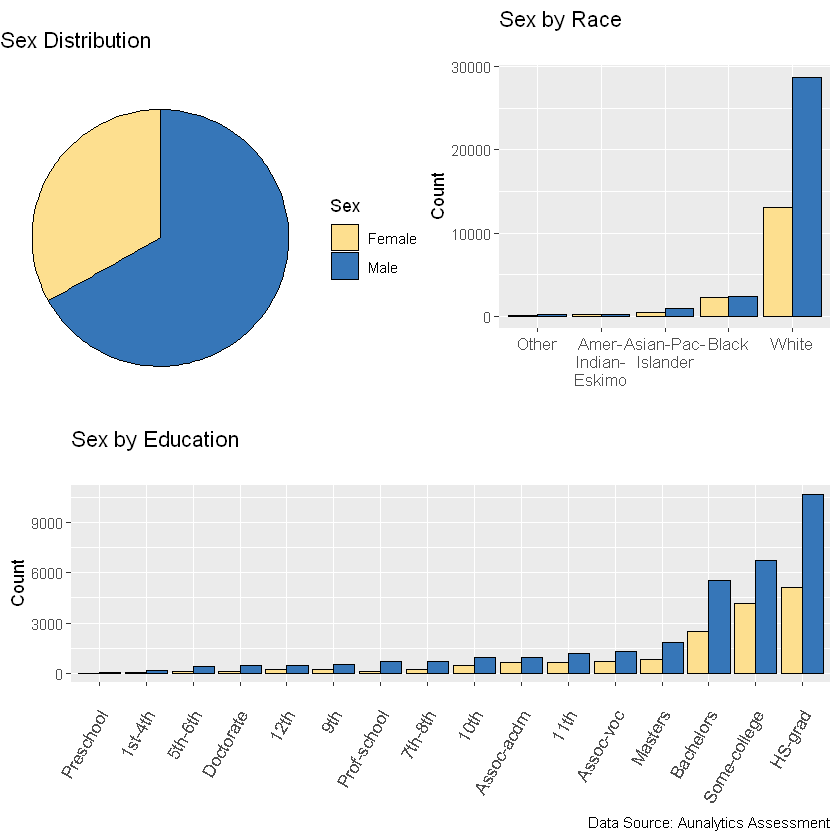

In [3]:
# sex distribution
# ----------------------
sex_counts_df <- as.data.frame(table(dataset$sex))
sex_counts_df <- sex_counts_df %>% 
  rename(Sex = Var1)
sd1 <- ggplot(sex_counts_df, aes(x="", y=Freq, fill=Sex)) +
  geom_bar(stat="identity", width=1, color = 'black') +
  coord_polar("y", start=0) +
  theme_void() +
  labs(title = 'Sex Distribution', 
       legend = ' ',
       subtitle = ' ',
       x= '',
       y='Count') +
  scale_fill_manual(values=c('#FDDF8F', '#3676B8')) 


race_counts_df <- as.data.frame(table(dataset$sex, dataset$race))
sd2 <- ggplot(data = race_counts_df, aes(x = reorder(Var2, Freq), y=Freq, fill=Var1)) +
  geom_bar(stat = 'identity', color ='black', position = position_dodge()) +
  scale_fill_manual(values=c('#FDDF8F', '#3676B8')) +
  scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +
  guides(fill = guide_legend(title = 'Sex')) +
  labs(title = 'Sex by Race', 
       legend = 'Sex',
       subtitle = ' ',
       x= '',
       y='Count') +
  theme(axis.text.x = element_text(size = 10)) +
  theme(legend.position = 'none', axis.text.x = element_text(size = 10))



ed_counts_df <- as.data.frame(table(dataset$sex, dataset$education))
sd3 <- ggplot(data = ed_counts_df, aes(x = reorder(Var2, Freq), y=Freq, fill=Var1)) +
  geom_bar(stat = 'identity', color ='black', position = position_dodge()) +
  scale_fill_manual(values=c('#FDDF8F', '#3676B8')) +
  guides(fill = guide_legend(title = 'Sex')) +
  labs(title = 'Sex by Education', 
       legend = 'Sex',
       subtitle = ' ',
       caption = paste0('Data Source: Aunalytics Assessment'),
       x= '',
       y='Count') +
  theme(axis.text.x = element_text(angle = 60, vjust = 0.8, hjust=1, size = 10)) +
  theme(legend.position = 'none')

grid.arrange(sd1, sd2, sd3, heights = c(1,1), widths = c(1,1),
             nrow = 2,
             layout_matrix = rbind(c(1, 2),
                                   c(3, 3)))


Sex distrubtion is predominantly male. Interestingly, when broken down by race, most minority races have even sex distrubition, while white has more than double the male count over female count. For the most part, education distribution seems to have similar trends for both male and female. The trend of the top three values is similar to that reported by the National Center of Education Statistics in [Educational Attainment of Young Adults]('https://nces.ed.gov/programs/coe/pdf/coe_caa.pdf'). 

The difference between the amount of women recorded with high school level education and some college education is not large, but the same difference is significant for males. There is an interesting correlation between the data being predominantly white male and high school graduate education level. Looking at this article by Bookings [The Male College Crisis Is Not Just In Enrollment, But Completion]('https://www.brookings.edu/blog/up-front/2021/10/08/the-male-college-crisis-is-not-just-in-enrollment-but-completion/'), Figure 3 shows how the majority of all college level degrees are acquired by females. 

This collection of information supports that the sex distrubitions within the education and race variables are not heavily bias even though sex by itself is.

#### Age Distribution

In [4]:
# age distribution
# --------------------
summary(as.numeric(dataset$age))

a1 <- dataset %>% 
  ggplot(aes(x = as.integer(age))) +
  geom_histogram(bins = 30, fill = '#3676B8', col = 'black') +
  labs(
    x = '',
    y = 'Count') +
  theme(legend.position = 'none', plot.title = element_text(hjust = 0.5), panel.border = element_rect(color = 'black', fill = NA)) + 
  scale_x_continuous(breaks = seq(16,92,2))

a2 <- dataset %>% 
  ggplot(aes(x = as.integer(age))) +
  geom_boxplot(fill = '#3676B8') +
  labs(
    x = 'Age',
    y = ' ',
    caption = 'Source: Aunalytics Assessment'
  ) +
  theme(legend.position = 'none', plot.title = element_text(hjust = 0.5), panel.border = element_rect(color = 'black', fill = NA)) + 
  scale_x_continuous(breaks = seq(16,92,2))


# age distrubtion by salary class
dataset$class <- as.factor(dataset$class)
adens1 <- ggplot(dataset, aes(x = as.integer(age), fill = class)) +
  geom_density(alpha = 0.75) + 
  labs(title = 'Age Distrubution by Salary Class',
       x = 'Age',
       y = ' ',
       legend = '',
       caption = 'Source: Aunalytics Assessment') +
    scale_fill_manual(values =c('#93C8D7', '#DD9141'))


# age distribution by work class
dataset_age_sum <- dataset %>% 
  group_by(workclass) %>%
  summarise(as.numeric(age), .groups = 'drop')

dataset_age_sum <- dataset_age_sum %>% 
  rename(age = 'as.numeric(age)')

dataset_age_sum$workclass <- as.factor(dataset_age_sum$workclass)


asum1 <- ggplot(dataset_age_sum, aes(workclass, age, fill = workclass, color = age)) +
  geom_boxplot() +
  scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +
  labs(title = 'Age Distrubution by Work Class',
    x = ' ',
    y = 'Age',
    caption = 'Source: Aunalytics Assessment'
  ) +
  theme(legend.position = 'none', plot.title = element_text(hjust = 0.5), panel.border = element_rect(color = 'black', fill = NA)) +
  scale_fill_brewer(palette = "RdYlBu") +
  scale_y_continuous(breaks = seq(0,90,10))


# age distribution by marital status
dataset_age_sum2 <- dataset %>% 
  group_by(marital.status) %>%
  summarise(as.numeric(age), .groups = 'drop')

dataset_age_sum2 <- dataset_age_sum2 %>% 
  rename(age = 'as.numeric(age)')

dataset_age_sum2$marital.status <- as.factor(dataset_age_sum2$marital.status)


asum2 <- ggplot(dataset_age_sum2, aes(marital.status, age, fill = marital.status, color = age)) +
  geom_boxplot() +
  scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +
  labs(title = 'Age Distrubution by Marital Status',
       x = ' ',
       y = 'Age',
       caption = 'Source: Aunalytics Assessment'
  ) +
  theme(legend.position = 'none', plot.title = element_text(hjust = 0.5), panel.border = element_rect(color = 'black', fill = NA)) +
  scale_fill_brewer(palette = "RdYlBu") +
  scale_y_continuous(breaks = seq(0,90,10))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   12.00   21.00   22.64   32.00   74.00 

At this point it is worth noting that, for some reason of which I can currently not resolve, the summary outputs here in Jupyter Notebook are incorrect. I output the summaries to figure out the best range for the histograms. The correct values are as follows:

Age Distribution:
* Min: 17
* 1st Qu.: 28
* Median: 37
* Mean: 38.64
* 3rd Qu.: 48
* Max: 90

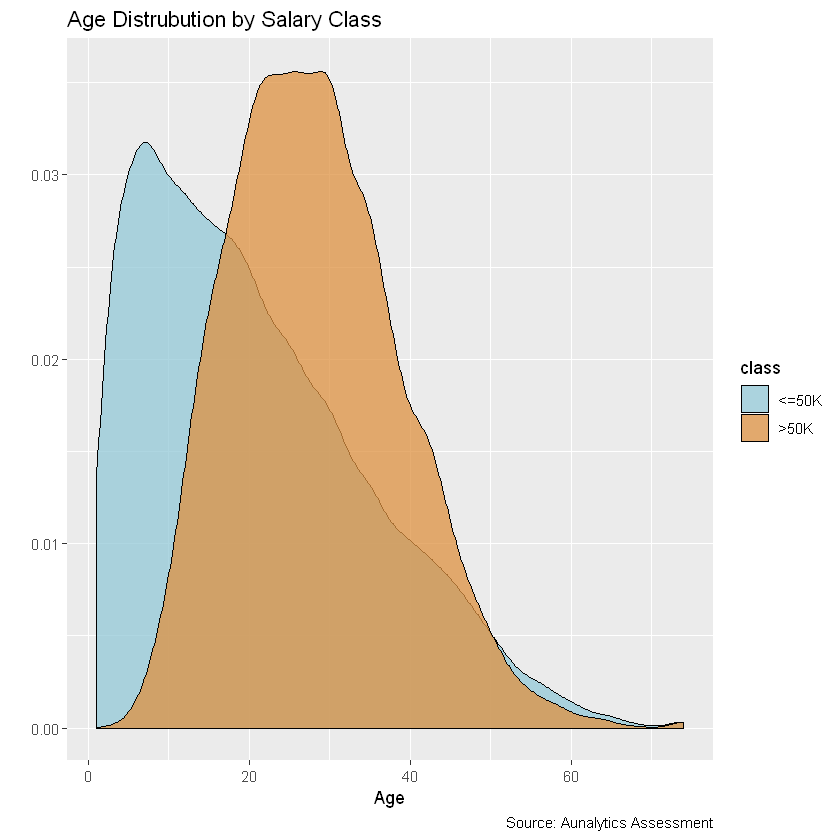

In [5]:
adens1

The age data presents a right-skewed distrubition. However, the skew of the high income class is not nearly as significant as it is for the low income class. It seems that it is more difficult or abnormal for younger adults to acquire higher income. Said in other words, it makes sense that older adults have acquired more wealth through the collection of skills and experience.

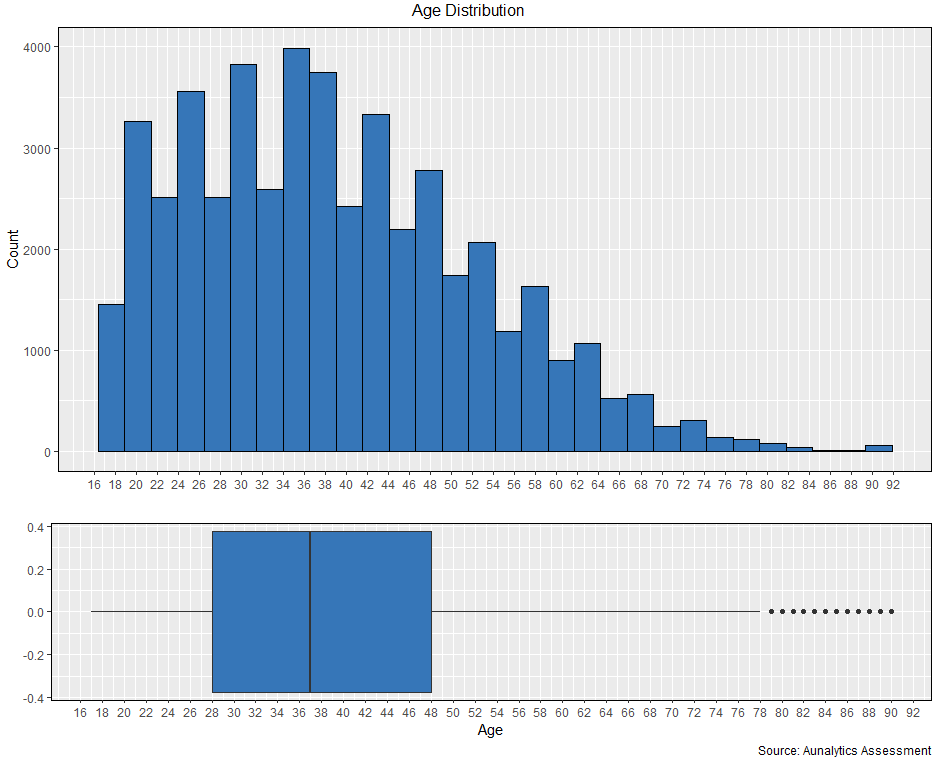

In [6]:
# This section is commented out because the code was working in R, but could not get it to work correctly in jupyter.
# Jupyter was requesting an uneccesary value for y for the box plots, and when y was left as blank (which worked in R),
# the result was only plotted dots
    # grid.arrange(a1, a2, heights = c(2,1),
    #              nrow = 2,
    #              top = 'Age Distribution')

# Visualizing the Age Distribution that was presented through R.
library("IRdisplay")
display_png(file='age_distribution.png')

Here we can see the interquartile range (IQR) matches that from our summary, with a value of 20 years, starting from age 28. Although the majority of age values are from about 30-50 years, the dominant education status is 'High School Graduate'.

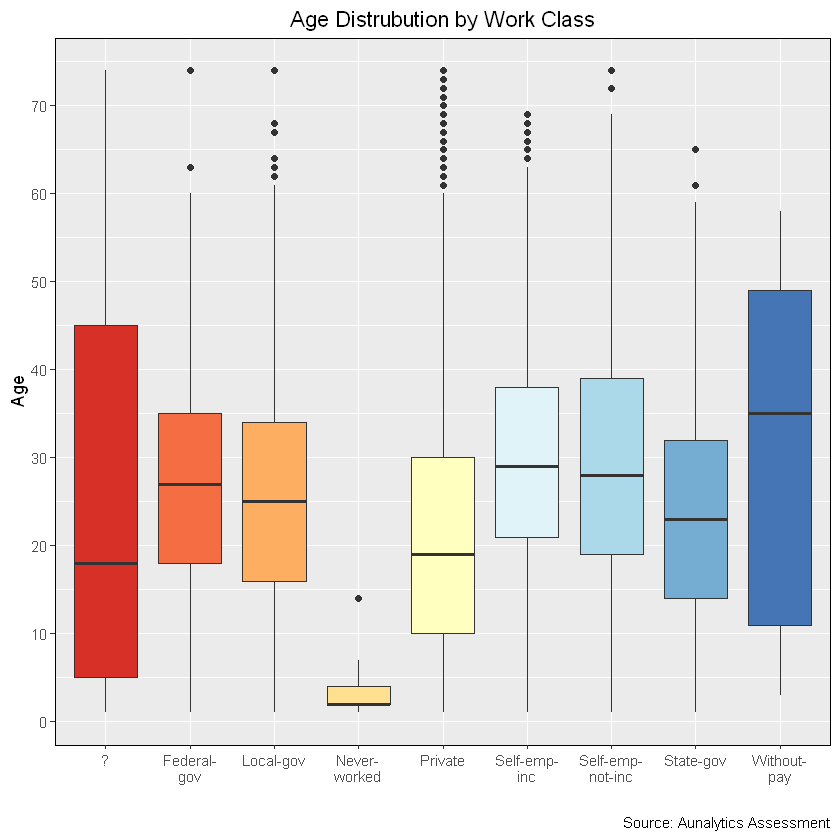

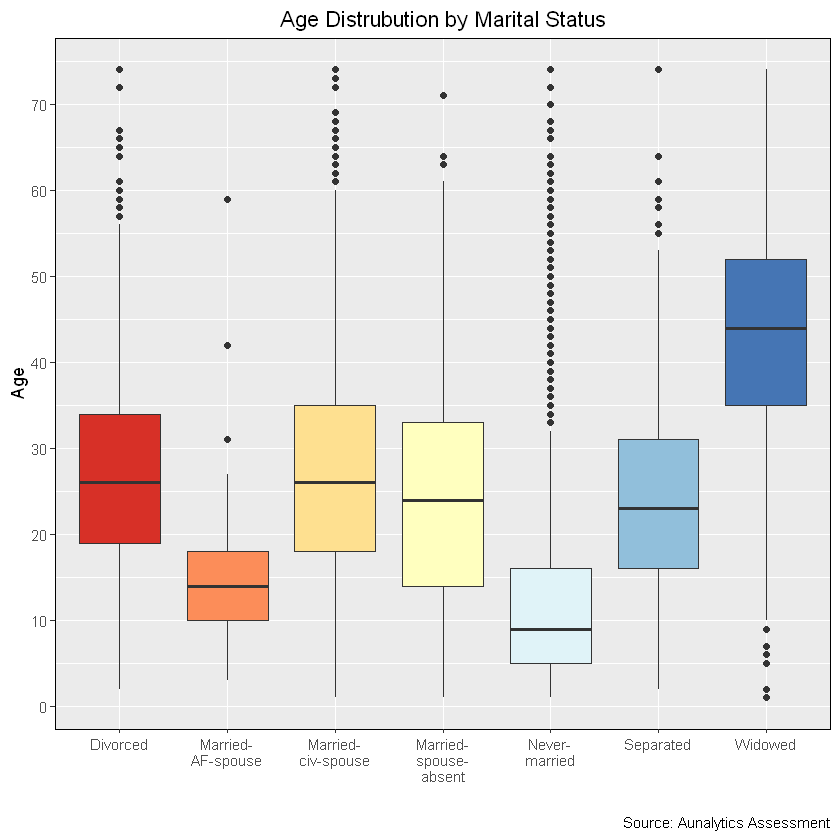

In [7]:
asum1
asum2

Breaking down age distribution by working class implies that unidentified working classes and working classes without pay cover a wider range of age variance than other working classes. The far opposite would be those who have never worked, which has an age distribution of all values below 15 years of age. In regards to the remainder of the listed working classes, most classes have similar median ages and IQRs, excluding the private class, which has a lower age distribution by about 5-10 years.

Age distribution by marital status implies  that of those who are married, spouses in the Armed Forces become married at a younger age, and are often married before the age of 20. The age distribution of divorced and married civilians are very similar, and the same is so for absent married individuals and seperated individuals. Individuals who are never married are generally the lowest age distribution, but it also has the highest outlier count. It makes sense that the age distrubtion of widowed individuals is significantly higher than all other marital status', with a median age roughly 18 years higher than runner up 'married civilians'.

#### Hours Worked Per Week

In [8]:
# hourly distribution
# ---------------------
summary(as.integer(dataset$hours.per.week))

h1 <- dataset %>% 
  ggplot(aes(x = as.integer(hours.per.week))) +
  geom_histogram(bins = 30, fill = '#3676B8', col = 'black') +
  labs(
    x = '',
    y = 'Count') +
  theme(legend.position = 'none', plot.title = element_text(hjust = 0.5), panel.border = element_rect(color = 'black', fill = NA)) + 
  scale_x_continuous(breaks = seq(0,100,10))

h2 <- dataset %>% 
  ggplot(aes(x = as.integer(hours.per.week))) +
  geom_boxplot(fill = '#3676B8') +
  labs(
    x = 'Hours Per Week',
    y = ' ',
    caption = 'Source: Aunalytics Assessment'
  ) +
  theme(legend.position = 'none', plot.title = element_text(hjust = 0.5), panel.border = element_rect(color = 'black', fill = NA)) + 
  scale_x_continuous(breaks = seq(0,90,10))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   35.00   35.00   36.08   40.00   96.00 

Again the summary values are incorrect. Acquired through RStudio:

Weekly Hour Distribution:
* Min: 1
* 1st Qu.: 40
* Median: 40
* Mean: 40.42
* 3rd Qu.: 45
* Max: 99

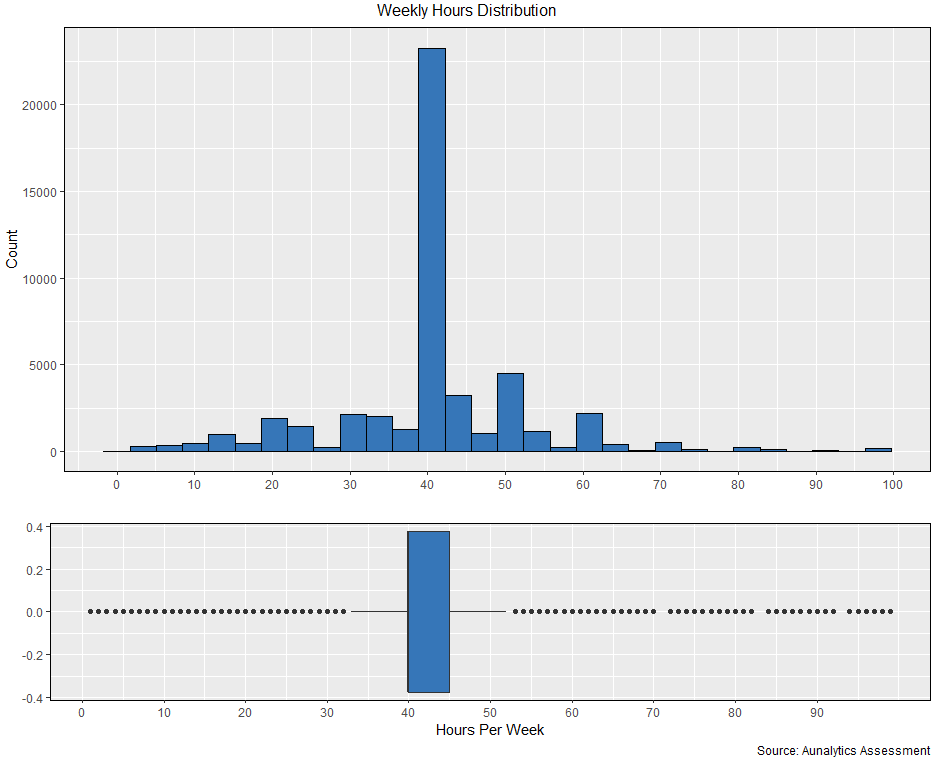

In [9]:
    # grid.arrange(h1, h2, heights = c(2,1),
    #              nrow = 2,
    #              top = 'Weekly Hours Distribution')
# Visualizing the Weekly Hours Distribution that was presented through R.
display_png(file='weekly_hours_distribution.png')

Worked hours per week is significantly centralized around 40-45 hours per week. In fact, any values above ~52 hours per week and below ~ 33 hours per week is considered numerically distant from the majority of the data and are outliers.

#### Salary Class

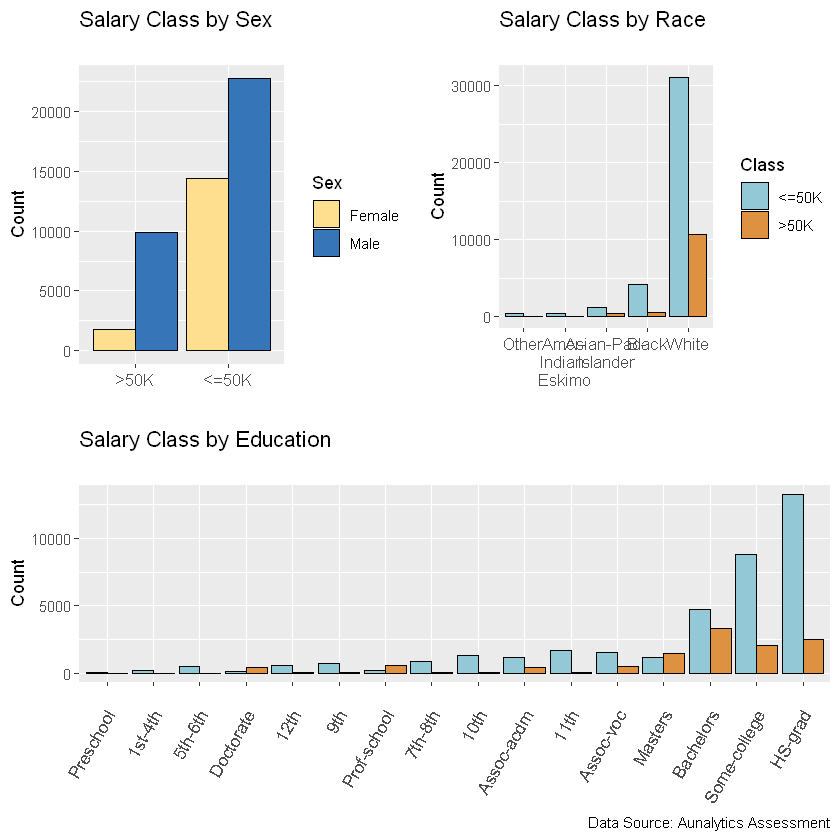

In [10]:
# Class distribution
# -----------------------
class_sex_counts_df <- as.data.frame(table(dataset$sex, dataset$class))
cl1 <- ggplot(data = class_sex_counts_df, aes(x = reorder(Var2, Freq), y=Freq, fill=Var1)) +
  geom_bar(stat = 'identity', color ='black', position = position_dodge()) +
  scale_fill_manual(values=c('#FDDF8F', '#3676B8')) +
  scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +
  guides(fill = guide_legend(title = 'Sex')) +
  labs(title = 'Salary Class by Sex', 
       legend = ' ',
       subtitle = ' ',
       x= '',
       y='Count') +
  theme(axis.text.x = element_text(size = 10)) 

class_race_counts_df <- as.data.frame(table(dataset$class, dataset$race))
cl2 <- ggplot(data = class_race_counts_df, aes(x = reorder(Var2, Freq), y=Freq, fill=Var1)) +
  geom_bar(stat = 'identity', color ='black', position = position_dodge()) +
  scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +
  guides(fill = guide_legend(title = 'Class')) +
  labs(title = 'Salary Class by Race', 
       legend = 'Class',
       subtitle = ' ',
       x= '',
       y='Count') +
  theme(axis.text.x = element_text(size = 10))  +
  scale_fill_manual(values =c('#93C8D7', '#DD9141'))



class_ed_counts_df <- as.data.frame(table(dataset$class, dataset$education))
cl3 <- ggplot(data = class_ed_counts_df, aes(x = reorder(Var2, Freq), y=Freq, fill=Var1)) +
  geom_bar(stat = 'identity', color ='black', position = position_dodge()) +
  guides(fill = guide_legend(title = 'Sex')) +
  labs(title = 'Salary Class by Education', 
       legend = '',
       subtitle = ' ',
       caption = paste0('Data Source: Aunalytics Assessment'),
       x= '',
       y='Count') +
  theme(axis.text.x = element_text(angle = 60, vjust = 0.8, hjust=1, size = 10)) +
  theme(legend.position = 'none') +
  scale_fill_manual(values =c('#93C8D7', '#DD9141'))

grid.arrange(cl1, cl2, cl3, heights = c(1,1), widths = c(1,1),
             nrow = 2,
             layout_matrix = rbind(c(1, 2),
                                   c(3, 3)))

Males make up the mass majority of those who achieve a salary greater than \\$50,000. Within all races, a larger proportion of individuals make less than \\$50,000 a year.

A large proportion of salaries are less than \\$50,000 per year up until a Bachelor's degree is acquired. For those who have a Bachelor's degree, \\$50k and below per year is still the majority salary range, but the difference between those above and below \\$50k is small. Educational degrees above Bachelor's have a higher proportion of salaries above \\$50k than below.